<a href="https://colab.research.google.com/github/EmodioAI/model-development/blob/main/Audio_GAN_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Repository**

In [ ]:
# !git clone https://github.com/maxxies/wavegan-emotion-audio.git
!git clone https://github.com/maxxies/Audio-Synthesis-CycleGAN.git

fatal: destination path 'Audio-Synthesis-CycleGAN' already exists and is not an empty directory.


In [ ]:
import os
os.chdir('Audio-Synthesis-CycleGAN')

In [ ]:
# for deleting folder
import shutil

shutil.rmtree('/content/Audio-Synthesis-CycleGAN', ignore_errors=True)


# **Dependencies installation**

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.5 MB/s eta 0:00:00
  Created wheel for pyworld: filename=pyworld-0.3.3-cp310-cp310-linux_x86_64.whl size=887683 sha256=c28538b7ecfc4ec7cf7ce6a2c7893d8e65128909263011cf8c4c85022839d3ac
  Stored in directory: /root/.cache/pip/wheels/70/50/a9/36b47c7f055bbee666a2b5718aaf85bce2152ef90f9bd10697
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=1a6e493d91d3c037201a2f1e4d836d00fccd4b6bfd478eb688abfb6f14da8d41
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b

# Mount dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Train model

In [ ]:
!python3  train.py

# Evaluation

In [ ]:
# module imports from repository
import utils
import models
import params
import numpy as np
import pescador
import librosa
import matplotlib.pyplot as plt

In [ ]:
def visualize_audio(audio_tensor, is_monphonic=False):
    # takes a batch ,n channels , window length and plots the spectogram
    audio = audio_tensor.detach().cpu().numpy()
    plt.figure(figsize=(18, 50))
    plt.subplot(10, 2, 1)
    if is_monphonic:
        plt.title("Monophonic %i" % (1))
        librosa.display.waveshow(audio[0], sr=16000)
    else:
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio[0])), ref=np.max)
        librosa.display.specshow(D, y_axis="linear")
        plt.colorbar(format="%+2.0f dB")
        plt.title("Linear-frequency power spectrogram %i" % (i))

    plt.show()

In [ ]:
neutral_data = utils.WavDataLoader('/content/drive/MyDrive/Dataset/Emotional Speech Audio/Audios/neutral')


In [ ]:
import torch

# Load the model.
checkpoint = torch.load("/content/drive/MyDrive/Dataset/Emotional Speech Audio/gan_happy_exp1.tar")
model_state_dict = checkpoint['generator']

# Create a new instance of the model.
model = models.WaveGANGenerator(slice_len = 65536 ,model_size=32,use_batch_norm=False,num_channels=1)

# Load the state_dict into the model.
model.load_state_dict(model_state_dict)

# Set the model to evaluation mode.
model.eval()


In [ ]:
# Generate random index
random_index = np.random.randint(0,10)

In [ ]:
# Select an audio based on index
test_audio=next(neutral_data)[random_index]

In [ ]:
test_audio.shape

In [ ]:
# plot selected audio
visualize_audio(test_audio, is_monphonic=True)


In [ ]:
device = next(model.parameters()).device
print(device)

In [ ]:
reshaped_input = test_audio.reshape(100, 16384)
input_tensor = torch.tensor(reshaped_input)

In [ ]:
# Make predictions.
with torch.no_grad():
  predictions = model(test_audio.to(device))

# Print the predictions.
print(predictions)

# **CycleGAN**

In [ ]:
# Load files
from params import train_A_dir, train_B_dir
import train

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# data_A_norm,data_B_norm = train.prepare_data(train_A_dir,train_B_dir)

In [ ]:
# import numpy as np
# import pickle
# #saving arr as a .pickle file externally, wb-write binary
# pickle.dump(data_A_norm,open("arrays_1.pickle","wb"))

In [ ]:
# pickle.dump(data_B_norm,open("arrays_2.pickle","wb"))

In [ ]:
import pickle

#Below is to read and retrieve its contents, rb-read binary
with open("/content/drive/MyDrive/Dataset/Emotional Speech Audio/arrays_1.pickle", "rb") as f:
    data_A_norm = pickle.load(f, encoding="latin1")
print(len(data_A_norm))
#Below is to read and retrieve its contents, rb-read binary
with open("/content/drive/MyDrive/Dataset/Emotional Speech Audio/arrays_2.pickle", "rb") as f:
    data_B_norm = pickle.load(f, encoding="latin1")
print(len(data_B_norm))

1303
1523


Epoch: 0/1
Iteration: 00000, Generator Learning Rate: 0.0002000, Discriminator Learning Rate: 0.0001000, Generator Loss : 30.2761841, Discriminator Loss : 0.5568391
Iteration: 00050, Generator Learning Rate: 0.0002000, Discriminator Learning Rate: 0.0001000, Generator Loss : 27.3682976, Discriminator Loss : 0.0000176
Iteration: 00100, Generator Learning Rate: 0.0002000, Discriminator Learning Rate: 0.0001000, Generator Loss : 31.5714359, Discriminator Loss : 0.0000256
Iteration: 00150, Generator Learning Rate: 0.0002000, Discriminator Learning Rate: 0.0001000, Generator Loss : 21.0025864, Discriminator Loss : 0.0000226
Iteration: 00200, Generator Learning Rate: 0.0002000, Discriminator Learning Rate: 0.0001000, Generator Loss : 25.7193241, Discriminator Loss : 0.0000001
Iteration: 00250, Generator Learning Rate: 0.0002000, Discriminator Learning Rate: 0.0001000, Generator Loss : 21.5575294, Discriminator Loss : 0.0000010
Iteration: 00300, Generator Learning Rate: 0.0002000, Discriminat

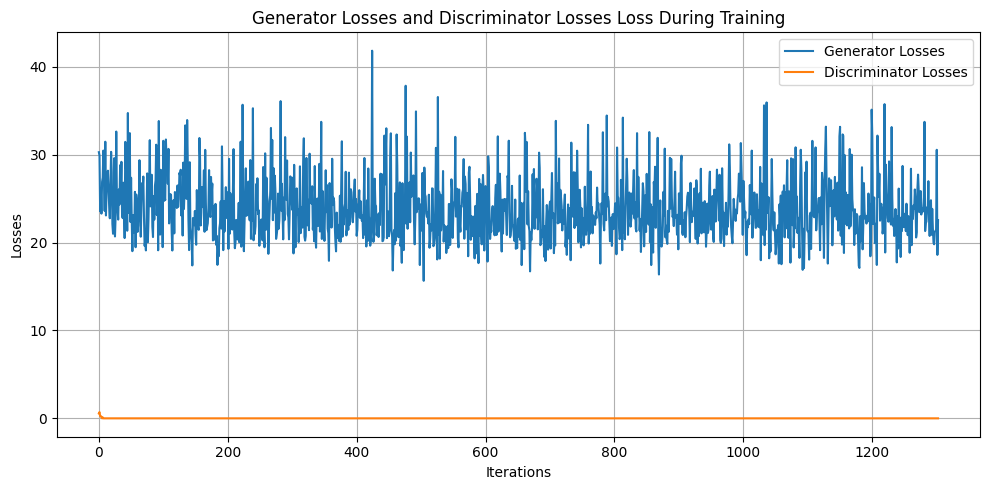

In [ ]:
train.train(data_A_norm,data_B_norm,0)